In [2]:
import os
import sys

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../../..')))

In [3]:

from src.pipeline.modules.clip import ClipFast
from src.pipeline.modules.helper.vision import rotation_image_proper
from src.pipeline.modules.cloth_matrix import ClothingSimilarity
from src.pipeline.modules.cloth_categories import ClothingCategories


from config.path import get_training_data_path
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import numpy as np


In [4]:
clip_instance = ClipFast(model_name='ViT-L/14')

In [65]:
relative_path = get_training_data_path('setup-v2', '0_mixed-stage-2-all')
fullpath = os.path.join(relative_path, 'frame474_dress.jpg')
print(fullpath)

/home/kohnle/master-projekt/dataset/production/setup-v2/0_mixed-stage-2-all/frame474_dress.jpg


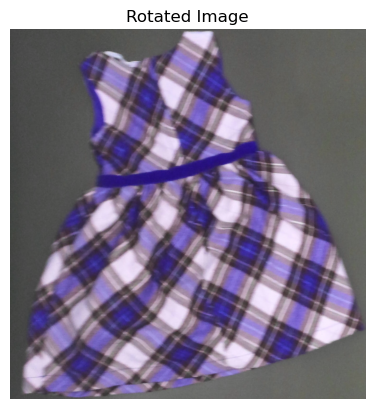

FINAL
{'dress or skirt': 0.6510467529296875, 'jacket or shirt': 0.055080413818359375, 'pant or short': 0.29392409324645996}
MAX
dress or skirt
FINAL
{'full body dress': 0.267120361328125, 'mini skirt': 0.70928955078125, 'long dress': 0.023496389389038086}
MAX
mini skirt


In [74]:
image = cv2.imread(fullpath)

rot_accuracy = []

rot_frame_rgb = image

# Display the rotated image using Matplotlib
plt.imshow(rot_frame_rgb)
plt.title('Rotated Image')
plt.axis('off')  # Hide axis
plt.show()

with_rotation = True

shirts = ["Shirt", 'T-Shirt']

top = ['dress or skirt', 'jacket or shirt', 'pant or short']

res = clip_instance.subpath(top, rot_frame_rgb, True)
print("FINAL")
print(res)
max_type = max(res, key=res.get)
print("MAX")
print(max_type)


top = ['a-line dress', 'mini skirt', 'long dress']

res = clip_instance.subpath(top, rot_frame_rgb, True)
print("FINAL")
print(res)
max_type = max(res, key=res.get)
print("MAX")
print(max_type)



In [15]:

    underwear_matrix = np.array([
        [1.0, 0.7, 0.2],  # Pant
        [0.7, 1.0, 0.7],  # Short
        [0.2, 0.7, 1.0]   # Skirt
    ])

ClothingSimilarity.get_weighted_accuracy(1, clip_instance.classes, res, underwear_matrix)

ValueError: too many values to unpack (expected 2)